In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [2]:
path = './instances/C108.txt'

In [3]:
solution = """0 0.0 1 830 4 923.0 3 1015.0 5 1106.0 0 1211.1327459504216
0 0.0 10 279 9 429 11 522.1622776601683 14 632.7778057882566 19 731.3801310552992 20 854.9211507177961 23 950.3063155249306 0 1053.3063155249306
0 0.0 24 15 26 502 27 595.605551275464 29 689.211102550928 30 784.211102550928 36 892.238858928248 35 992.238858928248 40 1112.652671579739 0 1223.2681997078273
0 0.0 41 63 43 156.605551275464 44 278 45 453 47 837 49 929.0 48 1024.0 50 1116.8284271247462 0 1229.631935626729
0 0.0 51 635 52 825 55 941.2488094968134 59 1035.2488094968135 0 1160.3059057827297
0 0.0 61 412 64 539 65 639.0 67 730.0 66 825.0 68 920.3851648071345 69 1015.3851648071345 0 1121.1965531079763
0 0.0 72 367 76 494.33630940518896 73 589.7214742123235 77 683.7214742123235 79 774.7214742123235 80 870.106639019458 83 992.8022044680017 86 1088.8022044680017 0 1205.2786090577492
0 0.0 90 20.615528128088304 89 640 91 756 94 868.5610283453569 96 963.9461931524914 0 1090.0017059071315
0 0.0 8 150 7 242.82842712474618 6 499 99 628 12 748.4138126514911 0 876.4926781808106
0 0.0 17 33.301651610693426 18 126.30165161069343 28 476 22 704 21 836 25 931.0 0 1036.1327459504216
0 0.0 31 144 34 655 39 753.0 37 848.3851648071345 42 970.4007859942988 53 1089.5555454685252 0 1224.7329734608313
0 0.0 60 463 62 586.5410196624969 75 847 71 995.309518948453 78 1092.309518948453 0 1232.5986827911736
0 0.0 82 293 84 388.8309518948453 87 484.66190378969065 92 604.7284965464364 100 706.7284965464364 98 807.168803055347 2 911.0971913325311 13 1024.6343959244107 0 1145.4402395259094
0 0.0 32 31.622776601683793 38 414 46 535.0483493925201 58 653.2086050731775 56 745.2086050731775 70 895.6238349411503 0 1044.1473344947485
0 0.0 81 47.43416490252569 85 470 88 563.0 95 673.2237484161567 97 768.6089132232912 15 898.9202019647839 0 1024.9757147194239
0 0.0 16 394 33 530.57252408878 57 661.1804050972739 54 756.5655699044084 93 925.0130045342291 0 1058.0246308694423
0 0.0 63 100 74 263 0 372.8494332412792""".split('\n')

In [4]:
def to_point(line):
    mapping = ['number', 'x', 'y', 'demand', 'ready_time', 'due_date', 'service_time']
    line = line.replace('\n', '').split()
    return {k:int(v) for k,v in zip(mapping, line)}

In [5]:
with open(path, 'r') as f:
    data = f.readlines()
points = list(map(to_point, data[9:]))

In [6]:
G = nx.Graph()
G.add_nodes_from(range(len(points)))
for route in solution:
    G.add_path(list(map(int, route.split()[::2])))

In [7]:
paths = []
for route in solution:
    path = []
    route = list(map(int, route.split()[::2]))
    for i in range(len(route) - 1):
        path.append((route[i], route[i+1]))
    paths.append(path)

C:\Users\gzhigalov\Documents\Programs\miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


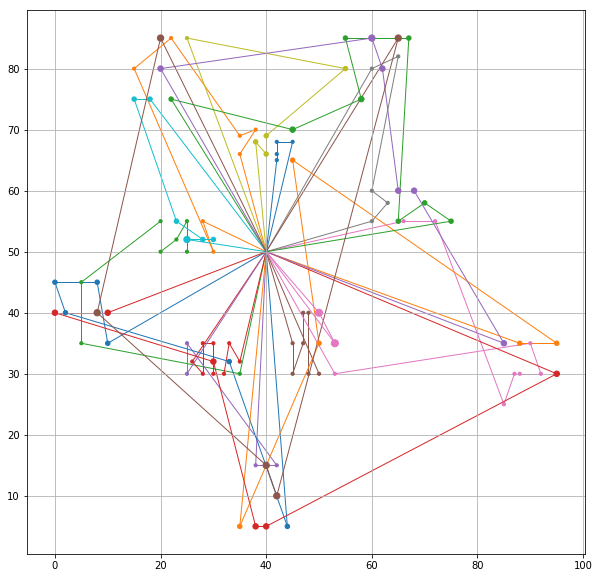

In [17]:
from itertools import cycle
col = cycle(colors.TABLEAU_COLORS)
# pos = nx.spring_layout(G)
pos = {point['number']: (point['x'], point['y']) for point in points}

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()

# nx.draw_networkx_labels(G, pos=pos, labels=labels, ax=ax)
for path in paths:
    # print(path)
    path_color = next(col)
    nodes_in_path = {x for p in path for x in p}
    node_sizes = [point['demand'] for point in points if point['number'] in nodes_in_path]
    
    labels = {filter(lambda x: x['number'] in nodes_in_path, points)}
    nx.draw_networkx_edges(G, pos=pos, edgelist=path, ax=ax, edge_color=path_color)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_in_path, node_size=node_sizes, node_color=path_color, ax=ax)